<a href="https://colab.research.google.com/github/Kate5-7-2021/Kate_INFO5731_Spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [39]:
#download nltk stopwords and spacy model
# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Import necessary pakages

import re
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy for lemmatization
import spacy

! pip install pyLDAvis
#Plotting tools
import pyLDAvis
import pyLDAvis.gensim 


In [42]:
#Enable logging for gensim - optional

import logging
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [43]:
#NLTK Stop words
from nltk.corpus import stopwords
stop_words= stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [44]:
df=pd.read_csv('/content/Article.csv', header= 0, encoding= 'unicode_escape')
print(df.Data_Mining_Articles.unique())
df.head(100)

['Data mining\xa0techniques and applications\x96A decade review from 2000 to 2011'
 'Visual\xa0data mining'
 'Systematic survey of big\xa0data\xa0and\xa0data mining\xa0in internet of things'
 'Detecting financial fraud using\xa0data mining\xa0techniques: A decade review from 2004 to 2015'
 'Global\xa0data mining: An empirical study of current trends, future forecasts and technology diffusions'
 'Data-mining\xa0technologies for diabetes: a systematic review'
 'Target discovery from data mining approaches'
 'Semantic data mining of financial news articles'
 'Evolving data into mining solutions for insights'
 'Methodological and practical aspects of\xa0data mining'
 'Educational\xa0data mining: A survey from 1995 to 2005'
 'Untangling text\xa0data mining'
 'Data mining\xa0and its applications for knowledge management: a literature review from 2007 to 2012'
 'Using text\xa0mining\xa0techniques for extracting information from research\xa0articles'
 'Data mining\xa0techniques in social media

,Data_Mining_Articles
0,Data mining techniques and applicationsA deca...
1,Visual data mining
2,Systematic survey of big data and data mining ...
3,Detecting financial fraud using data mining te...
4,Global data mining: An empirical study of curr...
...,...
95,Data mining: an overview from a database persp...
96,Credit scoring with a data mining approach bas...
97,Data mining of association structures to model...
98,Information visualization and visual data mining


In [45]:
# Remove emails and newline characters

#Convert to list
articles=df.Data_Mining_Articles.values.tolist()

#Remove emails
articles=[re.sub('\S*@\S*\s?','', sent) for sent in articles]

#Remove new line characters         #using this line of code in the next step gave me empty lists without words
#articles=[re.sub('\s+','',sent) for sent in articles]

#Remove distraction single quotes
articles= [re.sub("\'","", sent) for sent in articles]

pprint(articles[:])

['Data mining\xa0techniques and applications\x96A decade review from 2000 to '
 '2011',
 'Visual\xa0data mining',
 'Systematic survey of big\xa0data\xa0and\xa0data mining\xa0in internet of '
 'things',
 'Detecting financial fraud using\xa0data mining\xa0techniques: A decade '
 'review from 2004 to 2015',
 'Global\xa0data mining: An empirical study of current trends, future '
 'forecasts and technology diffusions',
 'Data-mining\xa0technologies for diabetes: a systematic review',
 'Target discovery from data mining approaches',
 'Semantic data mining of financial news articles',
 'Evolving data into mining solutions for insights',
 'Methodological and practical aspects of\xa0data mining',
 'Educational\xa0data mining: A survey from 1995 to 2005',
 'Untangling text\xa0data mining',
 'Data mining\xa0and its applications for knowledge management: a literature '
 'review from 2007 to 2012',
 'Using text\xa0mining\xa0techniques for extracting information from '
 'research\xa0articles',
 'Dat

In [46]:
def sent_to_words(sentences):    #use Gensim's simple_preprocess() to tokenize and create the list of words from each title 
   for sentence in sentences:    #use deacc=True to remove punctuations
      yield (gensim.utils.simple_preprocess(str(sentence),deacc=True))
articles_words=list(sent_to_words(articles))
print(articles_words[:100])

[['data', 'mining', 'techniques', 'and', 'applications', 'decade', 'review', 'from', 'to'], ['visual', 'data', 'mining'], ['systematic', 'survey', 'of', 'big', 'data', 'and', 'data', 'mining', 'in', 'internet', 'of', 'things'], ['detecting', 'financial', 'fraud', 'using', 'data', 'mining', 'techniques', 'decade', 'review', 'from', 'to'], ['global', 'data', 'mining', 'an', 'empirical', 'study', 'of', 'current', 'trends', 'future', 'forecasts', 'and', 'technology', 'diffusions'], ['data', 'mining', 'technologies', 'for', 'diabetes', 'systematic', 'review'], ['target', 'discovery', 'from', 'data', 'mining', 'approaches'], ['semantic', 'data', 'mining', 'of', 'financial', 'news', 'articles'], ['evolving', 'data', 'into', 'mining', 'solutions', 'for', 'insights'], ['methodological', 'and', 'practical', 'aspects', 'of', 'data', 'mining'], ['educational', 'data', 'mining', 'survey', 'from', 'to'], ['untangling', 'text', 'data', 'mining'], ['data', 'mining', 'and', 'its', 'applications', 'for'

In [47]:
# Build bigram and trigram model

#bigram= gensim.models.Phrases(articles_words, min_count=5, threshold=100)  #can create the fewer phrases with higher threshhold
#trigram= gensim.models.Phrases(articles_words, min_count=5, threshold=100)
#trigram= gensim.models.Phrases(bigram[articles_words], threshold=100)

# way to faster clubbed sentence
bigram_mod=gensim.models.phrases.Phraser(bigram)
trigram_mod=gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[articles_words[0]]])

['data', 'mining', 'techniques', 'and', 'applications', 'decade', 'review', 'from', 'to']


In [48]:
# stopwords, bigrams, trigrams and lemmatization functions

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
  return[bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
  return[trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB','ADV']):
 
  texts_out = []
  for sent in texts:
    doc = nlp(" ".join(sent))
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return texts_out

In [49]:
#remove stopwords

articles_words_nostops=remove_stopwords(articles_words)

#bigrams
articles_words_bigrams=make_bigrams(articles_words_nostops)

#use spacy 'en model( just keep tagger component)
# -m spacy download en

nlp=spacy.load('en', disable=['parser','ner'])

#keep noun, adjective, adverb and verb by lemmatization

articles_lemma=lemmatization(articles_words_bigrams, allowed_postags=['NOUN', 'ADJ','VERB','ADV'])

print(articles_lemma[:5])

[['datum', 'mining', 'technique', 'application', 'decade', 'review'], ['visual', 'data', 'mining'], ['systematic', 'survey', 'datum', 'datum', 'mining', 'internet', 'thing'], ['detect', 'financial', 'fraud', 'use', 'datum', 'mining', 'technique', 'decade', 'review'], ['global', 'empirical', 'study', 'current', 'trend', 'future', 'forecast', 'technology', 'diffusion']]


In [20]:
#create dictionary

dic1=corpora.Dictionary(articles_lemma)

#creat corpus
txt_1=articles_lemma

#term document frequency
corpus= [dic1.doc2bow(text) for text in txt_1]

print(corpus[:5])    #the results are the mapping of the "word_id", "word_frequency" that are the unique ID created by Gensim 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(3, 1), (6, 1), (7, 1)], [(1, 2), (3, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]]


In [21]:
#to find the corresponding word to each ID

dic1[3]

'mining'

In [22]:
#the readable form of the dictionary

[[(dic1[id],freq) for id, freq in cp] for cp in corpus[:5]]

[[('application', 1),
  ('datum', 1),
  ('decade', 1),
  ('mining', 1),
  ('review', 1),
  ('technique', 1)],
 [('mining', 1), ('data', 1), ('visual', 1)],
 [('datum', 2),
  ('mining', 1),
  ('internet', 1),
  ('survey', 1),
  ('systematic', 1),
  ('thing', 1)],
 [('datum', 1),
  ('decade', 1),
  ('mining', 1),
  ('review', 1),
  ('technique', 1),
  ('detect', 1),
  ('financial', 1),
  ('fraud', 1),
  ('use', 1)],
 [('current', 1),
  ('diffusion', 1),
  ('empirical', 1),
  ('forecast', 1),
  ('future', 1),
  ('global', 1),
  ('study', 1),
  ('technology', 1),
  ('trend', 1)]]

In [227]:
# build LDA model
#update_every:the time for reupdating the model, chunksize:number of documents used , 
#passes:total number of training passes, alpha:it is hyperparameter affects aparsity of the topics

articles_lda=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dic1, num_topics=15, random_state=100,
                                             update_every=1,            
                                             chunksize=100,               
                                             passes=10,                 
                                             alpha='auto',             
                                             per_word_topics=True)

In [228]:
#test the LDA model and view the topics
#use lda_model.print_topics() to the keywords for each topic and the weightage[importance] of each keywords

pprint(articles_lda.print_topics())
doc_lda=articles_lda[corpus]

#the results show the keywords contributes to each topic and the numbers are the weigth of each keywords
#each number represents the importance of the keyword to the topic

[(0,
  '0.135*"mining" + 0.068*"datum" + 0.068*"text" + 0.046*"identification" + '
  '0.046*"corpus" + 0.046*"topic" + 0.024*"quality" + 0.024*"medicine" + '
  '0.024*"improvement" + 0.024*"product"'),
 (1,
  '0.081*"mining" + 0.055*"datum" + 0.055*"educational" + 0.028*"application" '
  '+ 0.028*"technique" + 0.028*"system" + 0.028*"intervention" + 0.028*"type" '
  '+ 0.028*"education" + 0.028*"diabete"'),
 (2,
  '0.103*"mining" + 0.089*"datum" + 0.044*"review" + 0.031*"technique" + '
  '0.030*"machine" + 0.030*"institution" + 0.030*"financial" + 0.030*"learn" + '
  '0.016*"management" + 0.015*"education"'),
 (3,
  '0.069*"mining" + 0.035*"data" + 0.035*"technique" + 0.018*"text" + '
  '0.018*"factor" + 0.018*"news" + 0.018*"literature" + 0.018*"affect" + '
  '0.018*"student" + 0.018*"education"'),
 (4,
  '0.040*"datum" + 0.040*"mining" + 0.040*"mine" + 0.040*"financial" + '
  '0.040*"library" + 0.040*"article" + 0.040*"academic" + 0.040*"literature" + '
  '0.040*"alarm" + 0.040*"sema

In [229]:
#COHERENCE SCORE
#use model perplexity and topic coherence to judge how good the topic model is.(coherence is more helpful)

#calculate Perplexity
print('\nPerplexity: ', articles_lda.log_perplexity(corpus))      #lower perplexity result means better result

#calculate Coherence Score using c_v
coherence_model_lda=CoherenceModel(model=articles_lda, texts= articles_lemma, dictionary=dic1, coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence: ', coherence_lda)



Perplexity:  -5.789195802897514

Coherence:  0.43911896357228297


In [230]:
#calculate Coherence Score using UMass
coherence_model_lda=CoherenceModel(model=articles_lda, texts= articles_lemma, dictionary=dic1, coherence='u_mass')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence: ', coherence_lda)


Coherence:  -14.990152424845691


In [231]:
#visualization of the topic keywords

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare (articles_lda, corpus, dic1)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.079894  0.136623       1        1  15.546596
7      0.027631  0.079665       2        1  11.319170
2      0.093502  0.005478       3        1   8.979786
12     0.027761 -0.178505       4        1   8.744507
13     0.107052 -0.001777       5        1   8.411851
3     -0.090683  0.035773       6        1   7.382663
6      0.099595 -0.049004       7        1   7.278109
8      0.045494 -0.012973       8        1   7.159791
9     -0.038875 -0.017812       9        1   5.624004
0     -0.076249  0.085997      10        1   5.052304
1      0.025944 -0.009372      11        1   4.103813
11    -0.134402 -0.037776      12        1   3.106333
14    -0.090788  0.001495      13        1   2.943059
4     -0.037340 -0.049321      14        1   2.309114
5     -0.038536  0.011510      15        1   2.038900, topic_info=           Term    Freq     Total Category  logprob  loglift
29         mine  8.0000  8.000000  Default  30.0000  30.0000
0   application  9.0000  9.000000  Default  29.0000  29.0000
6          data  4.0000  4.000000  Default  28.0000  28.0000
38         text  5.0000  5.000000  Default  27.0000  27.0000
15          use  7.0000  7.000000  Default  26.0000  26.0000
..          ...     ...       ...      ...      ...      ...
19     forecast  0.0327  1.427680  Topic15  -5.9212   0.1163
20       future  0.0327  2.190568  Topic15  -5.9212  -0.3118
21       global  0.0327  1.427680  Topic15  -5.9212   0.1163
22        study  0.0327  3.801396  Topic15  -5.9212  -0.8630
23   technology  0.0327  2.165444  Topic15  -5.9212  -0.3003

[641 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
73        2  0.497380        academic
73       14  0.497380        academic
209       1  0.663477        accident
100       9  0.718189  accomplishment
139       7  0.694587        accuracy
...     ...       ...             ...
7         7  0.387234          visual
7        13  0.387234          visual
222      13  0.793386   visualization
177       8  0.700437             way
193       4  0.685779            wine

[409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 8, 3, 13, 14, 4, 7, 9, 10, 1, 2, 12, 15, 5, 6])

Summary: the bubbles which represent the topics have different sizes and the size of the bubble shows how common the topic is through out the text data. Larger bubble is more widespread than the smaller bubble. 
Usually the best k value is the k that provides the lower perplexity and higher coherence values.In this case by increasing the number of topics k from 15 to 30 and then to 99 the perplexity value decreased and the coherence value increase, which from one side of view means that increasing k is better; however, by increasing k the complexity of the scatter plots become more  and it shows more overlapping. Even with the k of 99 the system is not able to create the scatterplot. So, by testing different k I think the k of 15 or around this number would be the optimal k values for this model. 
In addition, the scatter plotand the results of the 'test the LDA model and view the topics' show that the topics such as 'mining', 'datum', 'technique' has the higher frequency amoung chosen topics than the others. 
The respective values of the preplexity and coherence for: 
k=30: -6.0812...     0.4391...
k=60:  -6.0544...     0.4973...
k=99:  -6.9005...     0.5212...

Here are the topics with the frequency of their terms:
[(0,
  '0.135*"mining" + 0.068*"datum" + 0.068*"text" + 0.046*"identification" + '
  '0.046*"corpus" + 0.046*"topic" + 0.024*"quality" + 0.024*"medicine" + '
  '0.024*"improvement" + 0.024*"product"'),
 (1,
  '0.081*"mining" + 0.055*"datum" + 0.055*"educational" + 0.028*"application" '
  '+ 0.028*"technique" + 0.028*"system" + 0.028*"intervention" + 0.028*"type" '
  '+ 0.028*"education" + 0.028*"diabete"'),
 (2,
  '0.103*"mining" + 0.089*"datum" + 0.044*"review" + 0.031*"technique" + '
  '0.030*"machine" + 0.030*"institution" + 0.030*"financial" + 0.030*"learn" + '
  '0.016*"management" + 0.015*"education"'),
 (3,
  '0.069*"mining" + 0.035*"data" + 0.035*"technique" + 0.018*"text" + '
  '0.018*"factor" + 0.018*"news" + 0.018*"literature" + 0.018*"affect" + '
  '0.018*"student" + 0.018*"education"'),
 (4,
  '0.040*"datum" + 0.040*"mining" + 0.040*"mine" + 0.040*"financial" + '
  '0.040*"library" + 0.040*"article" + 0.040*"academic" + 0.040*"literature" + '
  '0.040*"alarm" + 0.040*"semantic"'),
 (5,
  '0.083*"apply" + 0.043*"breast" + 0.043*"diagnosis" + 0.043*"cancer" + '
  '0.043*"prognosis" + 0.043*"classification" + 0.043*"technique" + '
  '0.043*"datum" + 0.043*"mining" + 0.003*"survey"'),
 (6,
  '0.103*"datum" + 0.069*"mining" + 0.052*"technique" + 0.040*"mine" + '
  '0.036*"review" + 0.035*"application" + 0.034*"management" + '
  '0.034*"relationship" + 0.034*"customer" + 0.026*"clinical"'),
 (7,
  '0.108*"mining" + 0.108*"datum" + 0.037*"use" + 0.037*"technique" + '
  '0.025*"research" + 0.025*"fraud" + 0.025*"detection" + 0.013*"nursing" + '
  '0.013*"text" + 0.013*"build"'),
 (8,
  '0.105*"mining" + 0.053*"datum" + 0.036*"diabete" + 0.036*"learning" + '
  '0.036*"review" + 0.036*"technology" + 0.036*"machine" + 0.036*"systematic" '
  '+ 0.018*"role" + 0.018*"novel"'),
 (9,
  '0.085*"datum" + 0.064*"mining" + 0.064*"analysis" + 0.043*"processing" + '
  '0.022*"heart" + 0.022*"biology" + 0.022*"accomplishment" + 0.022*"mine" + '
  '0.022*"pre" + 0.022*"post"'),
 (10,
  '0.194*"mining" + 0.150*"datum" + 0.044*"technique" + 0.036*"application" + '
  '0.036*"survey" + 0.027*"base" + 0.009*"use" + 0.009*"systematic" + '
  '0.009*"method" + 0.009*"text"'),
 (11,
  '0.065*"mining" + 0.033*"aspect" + 0.033*"data" + 0.033*"article" + '
  '0.033*"news" + 0.033*"stock" + 0.033*"prediction" + 0.033*"practical" + '
  '0.033*"methodological" + 0.033*"use"'),
 (12,
  '0.070*"mine" + 0.045*"review" + 0.045*"mining" + 0.030*"systematic" + '
  '0.030*"machine" + 0.030*"literature" + 0.030*"base" + 0.030*"datum" + '
  '0.030*"medicine" + 0.024*"clinical"'),
 (13,
  '0.123*"mining" + 0.092*"datum" + 0.047*"application" + 0.031*"learning" + '
  '0.031*"knowledge" + 0.031*"analytic" + 0.031*"research" + 0.031*"review" + '
  '0.031*"database" + 0.016*"preprocesse"'),
 (14,
  '0.099*"mining" + 0.067*"data" + 0.067*"visual" + 0.035*"fraud" + '
  '0.035*"claim" + 0.035*"care" + 0.035*"visualization" + 0.035*"health" + '
  '0.035*"information" + 0.035*"find"')]


In [235]:
#Compute c_v coherence for various number of topics
#Parameters:
#dictionary : Gensim dictionary
#corpus : Gensim corpus
#texts : List of input texts
#limit : Max num of topics
#Returns:
#model_list : List of LDA topic models
#coherence_values : Coherence values corresponding to the LDA model with respective number of topics
from gensim.models.ldamodel import LdaModel
def compute_coherence_values(dic1, corpus, texts, limit, start=2, step=3):    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dic1, num_topics=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=articles_lda, texts=articles_lemma, dictionary=dic1, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
print(coherence_values[:1])

[0.43911896357228297]


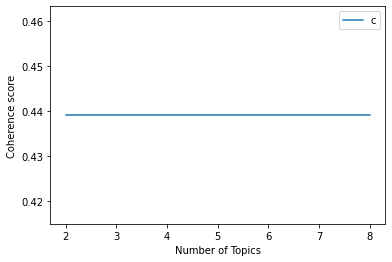

In [236]:
import matplotlib.pyplot as plt
#model_list, coherence_values = compute_coherence_values(dic1=dic1, corpus=corpus, texts=articles_lemma, start=2, stop=12, step=1)
#stop=12; start=2; step=6;
#x = range(start, stop, step)
#plt.plot(x, coherence_values)
#plt.xlabel("Num Topics")
#plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
#plt.show()

def plot_graph(doc_clean,start, limit, step):
    dic1,corpus=prepare_corpus(articles_lemma)
    model_list, coherence_values = compute_coherence_values(dic1, corpus,articles_lemma, limit, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


start,limit,step=2,12,6
plot_graph(articles_lemma,start,limit,step)




## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [64]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [65]:
#NLTK Stop words
from nltk.corpus import stopwords
stop_words= stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [66]:
df=pd.read_csv('/content/Article.csv', header= 0, encoding= 'unicode_escape')
print(df.Data_Mining_Articles.unique())
df.head(100)

['Data mining\xa0techniques and applications\x96A decade review from 2000 to 2011'
 'Visual\xa0data mining'
 'Systematic survey of big\xa0data\xa0and\xa0data mining\xa0in internet of things'
 'Detecting financial fraud using\xa0data mining\xa0techniques: A decade review from 2004 to 2015'
 'Global\xa0data mining: An empirical study of current trends, future forecasts and technology diffusions'
 'Data-mining\xa0technologies for diabetes: a systematic review'
 'Target discovery from data mining approaches'
 'Semantic data mining of financial news articles'
 'Evolving data into mining solutions for insights'
 'Methodological and practical aspects of\xa0data mining'
 'Educational\xa0data mining: A survey from 1995 to 2005'
 'Untangling text\xa0data mining'
 'Data mining\xa0and its applications for knowledge management: a literature review from 2007 to 2012'
 'Using text\xa0mining\xa0techniques for extracting information from research\xa0articles'
 'Data mining\xa0techniques in social media

,Data_Mining_Articles
0,Data mining techniques and applicationsA deca...
1,Visual data mining
2,Systematic survey of big data and data mining ...
3,Detecting financial fraud using data mining te...
4,Global data mining: An empirical study of curr...
...,...
95,Data mining: an overview from a database persp...
96,Credit scoring with a data mining approach bas...
97,Data mining of association structures to model...
98,Information visualization and visual data mining


In [67]:
df['Data_Mining_Articles']=df['Data_Mining_Articles'].str.lower()
df['Data_Mining_Articles'].head(10)

0    data mining techniques and applicationsa deca...
1                                   visual data mining
2    systematic survey of big data and data mining ...
3    detecting financial fraud using data mining te...
4    global data mining: an empirical study of curr...
5    data-mining technologies for diabetes: a syste...
6         target discovery from data mining approaches
7      semantic data mining of financial news articles
8     evolving data into mining solutions for insights
9    methodological and practical aspects of data m...
Name: Data_Mining_Articles, dtype: object

In [69]:
st=PorterStemmer()
df['Data_Mining_Articles']=df['Data_Mining_Articles'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Data_Mining_Articles'].head(10)

0    data mine techniqu and applicationsa decad re...
1                                     visual data mine
2    systemat survey of big data and data mine in i...
3    detect financi fraud use data mine techniques:...
4    global data mining: an empir studi of current ...
5    data-min technolog for diabetes: a systemat re...
6             target discoveri from data mine approach
7              semant data mine of financi news articl
8               evolv data into mine solut for insight
9           methodolog and practic aspect of data mine
Name: Data_Mining_Articles, dtype: object

In [ ]:
# Remove emails and newline characters

#Convert to list
articles=df.Data_Mining_Articles.values.tolist()

#Remove emails
articles=[re.sub('\S*@\S*\s?','', sent) for sent in articles]
#Remove distraction single quotes
articles= [re.sub("\'","", sent) for sent in articles]

pprint(articles[:])

In [70]:
def sent_to_words(sentences):    #use Gensim's simple_preprocess() to tokenize and create the list of words from each title 
   for sentence in sentences:    #use deacc=True to remove punctuations
      yield (gensim.utils.simple_preprocess(str(sentence),deacc=True))
articles_words=list(sent_to_words(articles))
print(articles_words[:100])

[['data', 'mining', 'techniques', 'and', 'applications', 'decade', 'review', 'from', 'to'], ['visual', 'data', 'mining'], ['systematic', 'survey', 'of', 'big', 'data', 'and', 'data', 'mining', 'in', 'internet', 'of', 'things'], ['detecting', 'financial', 'fraud', 'using', 'data', 'mining', 'techniques', 'decade', 'review', 'from', 'to'], ['global', 'data', 'mining', 'an', 'empirical', 'study', 'of', 'current', 'trends', 'future', 'forecasts', 'and', 'technology', 'diffusions'], ['data', 'mining', 'technologies', 'for', 'diabetes', 'systematic', 'review'], ['target', 'discovery', 'from', 'data', 'mining', 'approaches'], ['semantic', 'data', 'mining', 'of', 'financial', 'news', 'articles'], ['evolving', 'data', 'into', 'mining', 'solutions', 'for', 'insights'], ['methodological', 'and', 'practical', 'aspects', 'of', 'data', 'mining'], ['educational', 'data', 'mining', 'survey', 'from', 'to'], ['untangling', 'text', 'data', 'mining'], ['data', 'mining', 'and', 'its', 'applications', 'for'

In [74]:
def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ','VERB','ADV']):
  texts_out = []
  for sent in texts:
    doc = nlp(" ".join(sent))
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return texts_out

#remove stopwords

articles_words_nostops=remove_stopwords(articles_words)

nlp=spacy.load('en', disable=['parser','ner'])

#keep noun, adjective, adverb and verb by lemmatization

articles_lemma=lemmatization(articles_words_bigrams, allowed_postags=['NOUN', 'ADJ','VERB','ADV'])

print(articles_lemma[:5])

[['datum', 'mining', 'technique', 'application', 'decade', 'review'], ['visual', 'data', 'mining'], ['systematic', 'survey', 'datum', 'datum', 'mining', 'internet', 'thing'], ['detect', 'financial', 'fraud', 'use', 'datum', 'mining', 'technique', 'decade', 'review'], ['global', 'empirical', 'study', 'current', 'trend', 'future', 'forecast', 'technology', 'diffusion']]


In [79]:
#Input  : clean document
#Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
#Output : term dictionary and Document Term Matrix
   
def prepare_corpus(doc_clean):             # Creating the term dictionary of our courpus, where every unique term is assigned an index. 
    dic1 = corpora.Dictionary(articles_lemma)   # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    corpus = [dic1.doc2bow(text) for text in articles_lemma]   # generate LDA model
    return dic1,corpus
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [80]:
dic1[1]

'datum'

In [204]:
#Input  : clean document, number of topics and number of words associated with each topic
#Purpose: create LSA model using gensim
#Output : return LSA model
from pprint import pprint
#def create_gensim_lsa_model(articles_lemma,number_of_topics,words):
    #dic1,corpus=prepare_corpus(doc_clean)
                                                                                             # generate LSA model
    #articles_lsa = LsiModel(corpus, num_topics=number_of_topics, id2word = dic1)             # train model   
    #print(articles_lsa.print_topics(num_topics=number_of_topics, num_words=words))
    #return articles_lsa
articles_lsa = gensim.models.lsimodel.LsiModel(corpus=corpus, num_topics=100, id2word = dic1, chunksize=100)             # train model   
print(articles_lsa.print_topics())
doc_lsa= articles_lsa[corpus]



[(0, '0.700*"mining" + 0.591*"datum" + 0.209*"technique" + 0.153*"review" + 0.107*"application" + 0.087*"use" + 0.077*"systematic" + 0.076*"literature" + 0.060*"method" + 0.057*"financial"'), (1, '0.511*"datum" + -0.484*"technique" + -0.347*"review" + 0.234*"mine" + -0.194*"application" + -0.168*"literature" + -0.149*"mining" + -0.129*"classification" + -0.128*"detection" + 0.127*"analysis"'), (2, '-0.469*"mining" + 0.438*"review" + 0.321*"datum" + 0.254*"mine" + 0.245*"literature" + -0.217*"text" + 0.198*"systematic" + 0.172*"technique" + 0.162*"application" + -0.157*"base"'), (3, '-0.425*"use" + -0.415*"technique" + 0.251*"review" + -0.224*"method" + 0.218*"systematic" + -0.172*"cancer" + 0.171*"machine" + -0.170*"processing" + 0.161*"learn" + 0.155*"educational"'), (4, '0.426*"application" + -0.304*"use" + -0.282*"systematic" + -0.248*"review" + -0.238*"machine" + -0.200*"mine" + 0.179*"literature" + -0.171*"processing" + -0.160*"diagnose" + -0.157*"data"'), (5, '-0.531*"mine" + -0.

In [207]:

"""
    #Input   : dictionary : Gensim dictionary
              #corpus : Gensim corpus
              #texts : List of input texts
              #stop : Max num of topics
    #purpose : Compute c_v coherence for various number of topics
    #Output  : model_list : List of LSA topic models
              #coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
def compute_coherence_values(dic1, corpus, articles_lemma, stop, start=2, step=3):
    coherence_lsa = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(corpus, num_topics=num_topics, id2word = dic1)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=articles_lemma, dictionary=dic1, coherence='c_v')
        coherence_lsa.append(coherencemodel.get_coherence())
    return model_list, coherence_lsa
print(coherence_lsa)

0.6332586161655712


In [206]:
coherence_model_lsa=CoherenceModel(model=articles_lsa, texts= articles_lemma, dictionary=dic1, coherence='c_v')
coherence_lsa=coherence_model_lsa.get_coherence()
print('\nCoherence: ', coherence_lsa)                           #another way to find the coherence value



Coherence:  0.6332586161655712


In [188]:
def plot_graph(doc_clean,start, stop, step):
    dic1,corpus=prepare_corpus(articles_lemma)
    model_list, coherence_values = compute_coherence_values(dic1, corpus,articles_lemma,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

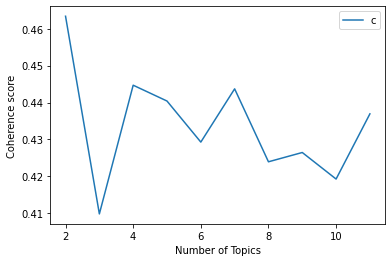

In [189]:
start,stop,step=2,12,1
plot_graph(articles_lemma,start,stop,step)

Diffeent k values are tested by using the LSA. For k=20 the coherence value was 0.4809..., for k=50 the coherence value was 
0.5424..., and for k=100 the coherence value was 0.6332. As it is obvious by increasing the k value the coherence value increases as well. 
based on that the k=100 can provide the better coherence value. 
Based on the graph k=3 provides the least coherence value.

(0, '0.700*"mining" + 0.591*"datum" + 0.209*"technique" + 0.153*"review" + 0.107*"application" + 0.087*"use" + 0.077*"systematic" + 0.076*"literature" + 0.060*"method" + 0.057*"financial"')

(1, '0.511*"datum" + -0.484*"technique" + -0.347*"review" + 0.234*"mine" + -0.194*"application" + -0.168*"literature" + -0.149*"mining" + -0.129*"classification" + -0.128*"detection" + 0.127*"analysis"')

(2, '-0.469*"mining" + 0.438*"review" + 0.321*"datum" + 0.254*"mine" + 0.245*"literature" + -0.217*"text" + 0.198*"systematic" + 0.172*"technique" + 0.162*"application" + -0.157*"base"')

(3, '-0.425*"use" + -0.415*"technique" + 0.251*"review" + -0.224*"method" + 0.218*"systematic" + -0.172*"cancer" + 0.171*"machine" + -0.170*"processing" + 0.161*"learn" + 0.155*"educational"')

(4, '0.426*"application" + -0.304*"use" + -0.282*"systematic" + -0.248*"review" + -0.238*"machine" + -0.200*"mine" + 0.179*"literature" + -0.171*"processing" + -0.160*"diagnose" + -0.157*"data"')

(5, '-0.531*"mine" + -0.309*"application" + -0.239*"data" + 0.221*"datum" + -0.212*"literature" + -0.201*"clinical" + 0.189*"technique" + -0.164*"medicine" + -0.147*"knowledge" + 0.136*"cancer"')

(6, '-0.317*"education" + -0.270*"student" + -0.270*"high" + -0.261*"data" + -0.253*"system" + -0.236*"management" + 0.201*"machine" + 0.189*"application" + -0.189*"knowledge" + -0.176*"technique"')

(7, '0.332*"text" + -0.328*"machine" + -0.279*"learning" + 0.257*"literature" + -0.233*"base" + 0.209*"review" + 0.203*"use" + -0.188*"technique" + -0.169*"application" + 0.165*"financial"')

(8, '0.433*"method" + 0.285*"application" + -0.206*"detection" + -0.188*"base" + 0.187*"processing" + -0.181*"financial" + -0.168*"mine" + 0.164*"analysis" + -0.156*"datum" + 0.150*"database"')
 
(9, '0.335*"base" + -0.254*"text" + 0.215*"literature" + 0.208*"management" + -0.190*"survey" + 0.187*"processing" + -0.180*"systematic" + 0.171*"analysis" + 0.170*"classification" + -0.161*"technique"')
 
(10, '-0.318*"data" + 0.286*"text" + 0.274*"study" + -0.219*"detection" + 0.191*"management" + -0.181*"financial" + 0.171*"current" + -0.148*"method" + 0.141*"customer" + 0.137*"technique"')

(11, '-0.358*"study" + -0.242*"technology" + -0.230*"future" + -0.214*"current" + -0.199*"forecast" + -0.199*"diffusion" + -0.199*"global" + -0.199*"trend" + -0.199*"empirical" + -0.193*"survey"')

(12, '0.346*"analysis" + -0.313*"cancer" + 0.239*"survey" + 0.217*"processing" + -0.189*"breast" + -0.174*"financial" + -0.166*"method" + -0.165*"current" + -0.159*"prediction" + -0.135*"diagnosis"')

(13, '0.387*"research" + 0.222*"customer" + -0.213*"approach" + -0.211*"knowledge" + -0.203*"machine" + 0.202*"relationship" + 0.191*"cancer" + -0.172*"survey" + -0.171*"financial" + -0.149*"database"')

(14, '0.355*"research" + 0.242*"financial" + 0.220*"method" + -0.206*"classification" + -0.198*"diagnosis" + -0.198*"prognosis" + -0.194*"cancer" + 0.192*"learning" + -0.183*"literature" + -0.144*"analysis"')

(15, '0.314*"survey" + -0.265*"analysis" + -0.254*"financial" + 0.248*"use" + 0.245*"systematic" + -0.212*"credit" + -0.161*"learn" + 0.152*"approach" + -0.152*"database" + 0.151*"cancer"')

(16, '-0.297*"credit" + 0.277*"educational" + 0.262*"learn" + 0.208*"detection" + -0.208*"literature" + -0.208*"predictive" + 0.182*"fraud" + 0.154*"evaluation" + -0.150*"systematic" + -0.144*"client"')

(17, '0.260*"management" + 0.250*"customer" + -0.226*"base" + 0.222*"relationship" + -0.217*"fraud" + 0.207*"machine" + 0.197*"news" + 0.187*"perspective" + 0.174*"learn" + 0.162*"data"')

(18, '-0.322*"knowledge" + -0.284*"learning" + -0.206*"literature" + 0.204*"customer" + 0.193*"base" + -0.167*"discovery" + 0.160*"approach" + 0.153*"application" + -0.150*"perspective" + 0.150*"relationship"')

(19, '0.514*"educational" + -0.189*"fraud" + -0.189*"knowledge" + 0.162*"approach" + 0.161*"learning" + 0.149*"system" + -0.146*"health" + 0.145*"education" + 0.133*"news" + 0.132*"state"')

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

LSA model is the simple model and it is easy to understand. Implementation with LSA is fast and easy as well. However, it has limitation of working with the data. It is linear model and if the dataset has non-linear relevant values the LSA model does not work properly for that dataset. To compare with the LDA model here, LDA has better performances and provides more information. There is the value of the perplexity for LDA that LSA does not have this valkue and this value prvide valuable information for how good the model is. In addition the LDA model has the feature for drawing the scatter plot from the topics which provides information about which topic is more common and also shows the value of the frequency for each term in the topic which is very important for decision making out of mining the dataset.  

In [ ]:
# Write your answer here (no code needed for this question)